# Implementation of three (3) different CNN models for Image Classification & model evaluation comparision

**Group Members:**

- Saiful Islam (10634911)

- Ruhit Ahmed Rizon (10640049)

**Dataset Selection:** In this project **Grapevine Leaves Image Dataset** is chosen for image classification. Grapevine leaves are a type of leaf that is often used in the traditional food culture of Turkish cuisine.

It has the following five classes:

1. Ak
2. Ala_Idris
3. Buzgulu
4. Dimnit
5. Nazli

Each of the class contains 100 images.

Link of the dataset: https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip

**Convolutional Neural Network (CNN):** A Convolutional Neural Network (CNN) is a specialized type of deep learning model optimized for processing structured grid data, like images. Unlike traditional neural networks, CNNs emphasize recognizing patterns in local input spaces, often used for tasks like image recognition. They employ layers of convolutional filters that process data in small chunks and then aggregate the information. Through a mix of convolutional layers, pooling operations, and fully connected layers, CNNs can detect intricate patterns in images, making them a staple in computer vision applications.

In this project, the following three CNN models are chosen for image classification:

1. ResNet50
2. VGG16
3. InceptionV3

**1. ResNet50:** ResNet50 is a variant of the Residual Network (ResNet) architecture, specifically designed with 50 layers to facilitate deep learning tasks without the hindrance of vanishing or exploding gradients. ResNet's unique feature is its "skip connections" or "residual blocks" that allow activations to bypass one or more layers. This design helps in gradient flow during backpropagation, enhancing the network's training efficiency.

**Mathematical Requirement:** ResNet50 is mathmatically expressed as:

F(x)=H(x)−x
where F(x) is the residual mapping to be learned and H(x) is the desired mapping & x is the input.

**Rules:**
- Each residual block contains two or more convolutional layers.
- Shortcut connections are used to skip one or more layers.
- The dimensions of the shortcut connection and the main path might differ. If they do, a linear transformation is applied to the shortcut connection to match the dimensions.
- ResNet networks can be very deep, with versions having 18, 34, 50, 101, and 152 layers.

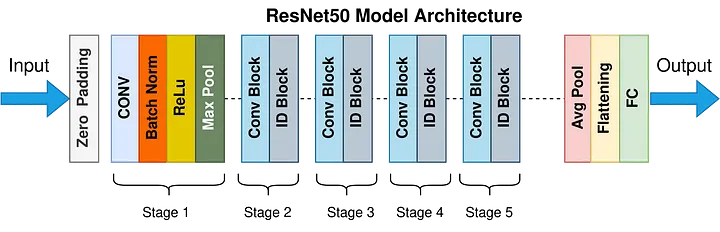

**2. VGG16:** VGG16 is a deep convolutional neural network architecture designed by the Visual Graphics Group (VGG) at Oxford University. This model stands out for its simplicity and depth, relying predominantly on 3x3 convolutional layers stacked on top of each other in increasing depth. With a total of 16 weight layers, including 13 convolutional layers followed by three fully connected layers, VGG16 was developed to classify objects into 1000 different categories. It's recognized for its robustness in handling varied image datasets and has been a foundational model for various computer vision tasks.

**Mathematical Requirement:** VGG16 uses 3x3 convolutional filters and 2x2 pooling layers.

**Rules:**
- Always use 3x3 convolution filters.
- Double the number of filters after each max-pooling layer.
- Use ReLU as the activation function.
- Use max-pooling layers of size 2x2 with a stride of 2.
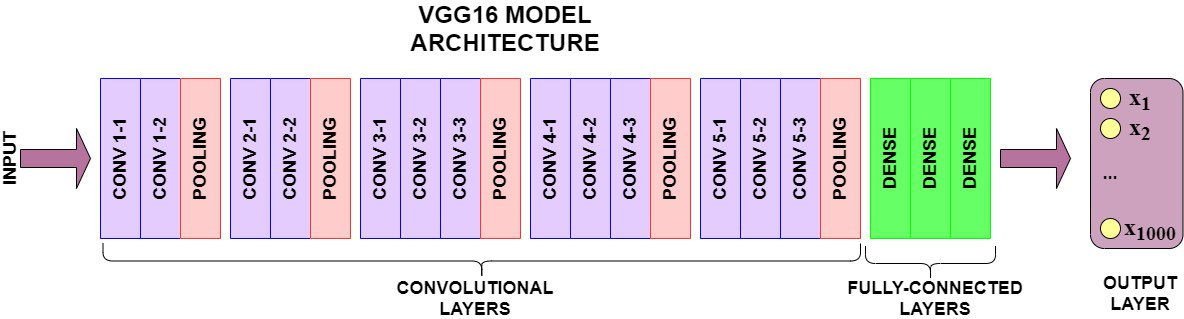

**3. InceptionV3:** To solve computer vision applications, Google's Inception series launched InceptionV3, a convolutional neural network design. This model is distinguished by its special "inception modules," which enable the network to select the appropriate convolutional operation at the appropriate size. InceptionV3 uses various kernel sizes concurrently rather than just one, which improves the network's capacity to adapt to different spatial patterns in images.

**Mathematical Requirement:**
- Utilizes multi-scale convolutional filters within the Inception module.
- The output from each filter type within an Inception module is concatenated together.

**Rules:**
- Each Inception module contains filters of different sizes operating in parallel.
- Uses 1x1 convolutions to reduce dimensions before the larger convolutions to keep the computational cost down.
- Incorporate batch normalization to stabilize the activations.
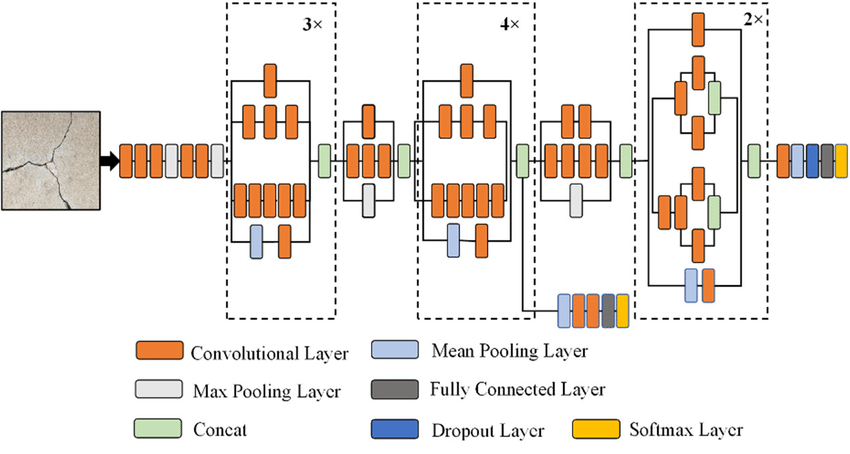

#Implementation

**Downloading dataset**

In [ ]:
!wget --no-check-certificate \
    https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip \
    -O /tmp/Grapevine_Leaves_Image_Dataset.zip

--2023-08-17 14:06:55--  https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113862245 (109M) [application/zip]
Saving to: ‘/tmp/Grapevine_Leaves_Image_Dataset.zip’

/tmp/Grapevine_Leav 100%[===================>] 108.59M  16.1MB/s    in 8.0s    

2023-08-17 14:07:04 (13.6 MB/s) - ‘/tmp/Grapevine_Leaves_Image_Dataset.zip’ saved [113862245/113862245]



**Unzipping and saving to local tmp folder**

In [ ]:
import zipfile

local_zip = '/tmp/Grapevine_Leaves_Image_Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') #Unzipping file
zip_ref.extractall('/tmp/') # Assigning tmp folder to save the unzipped folder into tmp folder
zip_ref.close()

**Printing the first two images of each class**

*********** Class: Nazli ***********


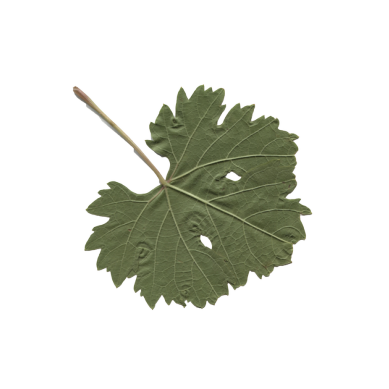

Shape of image:(511, 511)


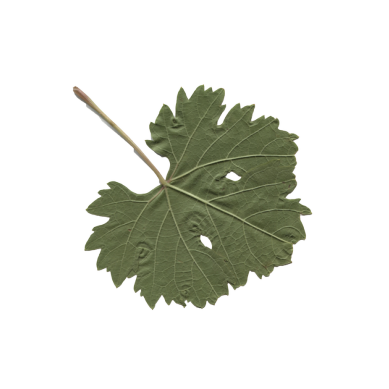

Shape of image:(511, 511)
*********** Class: Buzgulu ***********


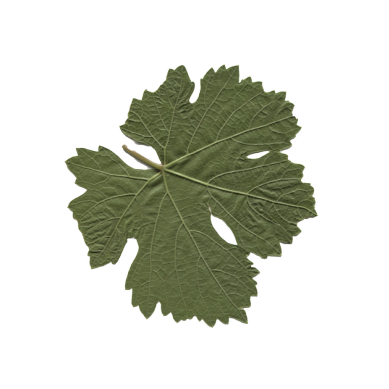

Shape of image:(511, 511)


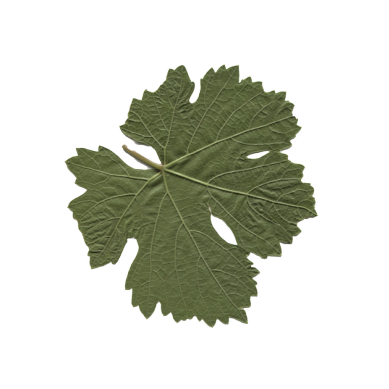

Shape of image:(511, 511)
*********** Class: Dimnit ***********


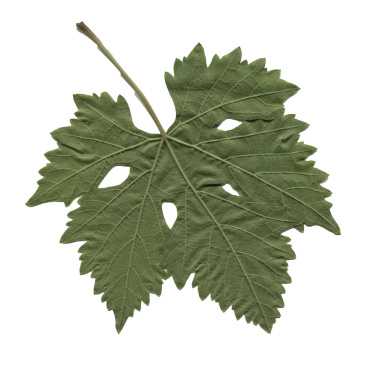

Shape of image:(511, 511)


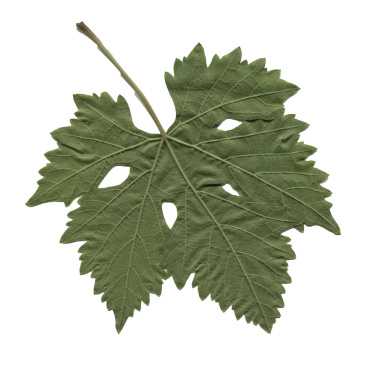

Shape of image:(511, 511)
*********** Class: Ak ***********


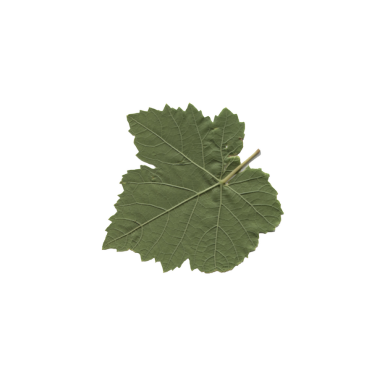

Shape of image:(511, 511)


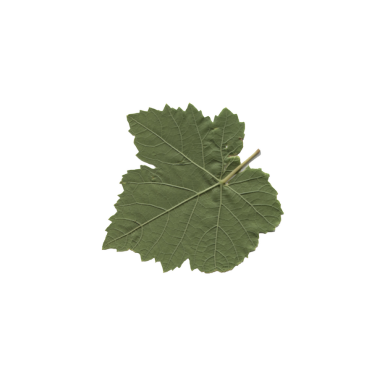

Shape of image:(511, 511)
*********** Class: Ala_Idris ***********


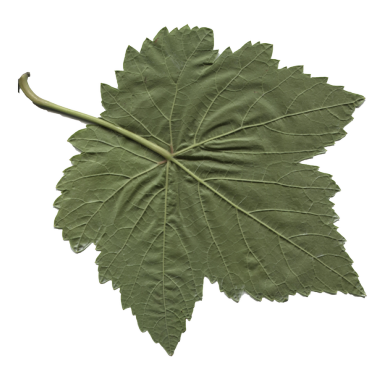

Shape of image:(511, 511)


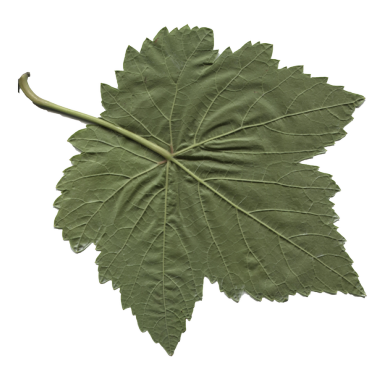

Shape of image:(511, 511)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

for dirname, _, filenames in os.walk('/tmp/Grapevine_Leaves_Image_Dataset'):
    for filename in filenames:
      img_path = os.path.join(dirname, filename)
      if img_path[-4:] != '.txt':
        print('*********** Class: ' + dirname.split("/")[3] + ' ***********')
        i = 0
        while i < 2: #Plotting first two images of the current directory
          img = mpimg.imread(img_path)
          plt.imshow(img)
          plt.axis('Off')
          plt.show()
          print('Shape of image:' + str(Image.open(img_path).size)) #Printing the shape of the image
          i += 1
      break

**Image preprocessing & train-test splitting**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(rescale=1/255.0, validation_split=0.2) #Splitting train-test data into 80%:20% ratio
base_dir = '/tmp/Grapevine_Leaves_Image_Dataset'
print('Train Data:')
trainData = data.flow_from_directory(
    directory=base_dir,
    target_size=(256, 256), #Shape of the image
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset="training"
)

print('Test Data:')
testData = data.flow_from_directory(
    directory=base_dir,
    target_size=(256, 256), #Shape of the image
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset="validation"
)

Train Data:
Found 400 images belonging to 5 classes.
Test Data:
Found 100 images belonging to 5 classes.


# Model design

**Function definition**: build_base_model() which builds the model given to it.

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

def build_base_model(base_model):
  for layer in base_model.layers:
    layer.trainable = False # Making base models non-trainable

  x = base_model.output
  x = layers.Flatten()(x) # Flattens the shape
  x = layers.Dense(1024, activation='relu')(x) # Hidden layer
  x = layers.Dropout(0.2)(x) # 20% Parameter dropout
  output = layers.Dense(5, activation='softmax')(x) # For 5 output classes
  built_model = Model(base_model.input, output) # Model building
  return built_model

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

**Funtion definition:** get_base_models() which lists the three models and calls build_base_model() to build each three models

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50

def get_base_models():
  model_list = ['ResNet50', 'VGG16', 'InceptionV3'] # The target three models
  models = dict()
  for model in model_list:
    models[model] = build_base_model(globals()[model](weights='imagenet', include_top=False, input_shape=(256, 256, 3))) # Calling of build_base_model() with input shape 256x256 with 3 channels for color images
  return models

**Calling of get_base_models()**

In [ ]:
built_models = get_base_models()
built_models

87910968/87910968 [==============================] - 0s 0us/step


{'ResNet50': <keras.engine.functional.Functional at 0x7e3ea0257160>,
 'VGG16': <keras.engine.functional.Functional at 0x7e3ea0160f40>,
 'InceptionV3': <keras.engine.functional.Functional at 0x7e3e810b98d0>}

**Architecture of ResNet50**

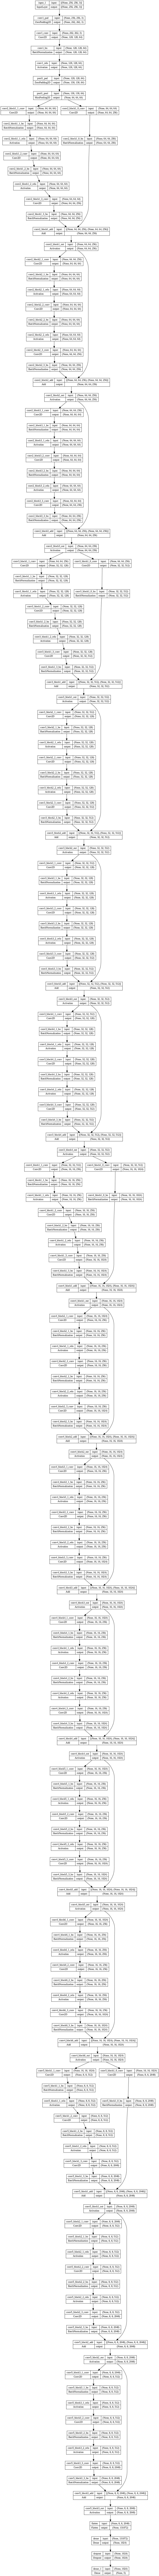

In [ ]:
plot_model(built_models['ResNet50'], show_layer_names=True, show_shapes =True, dpi=100) # Plotting model architecture

**Architecture of VGG16**

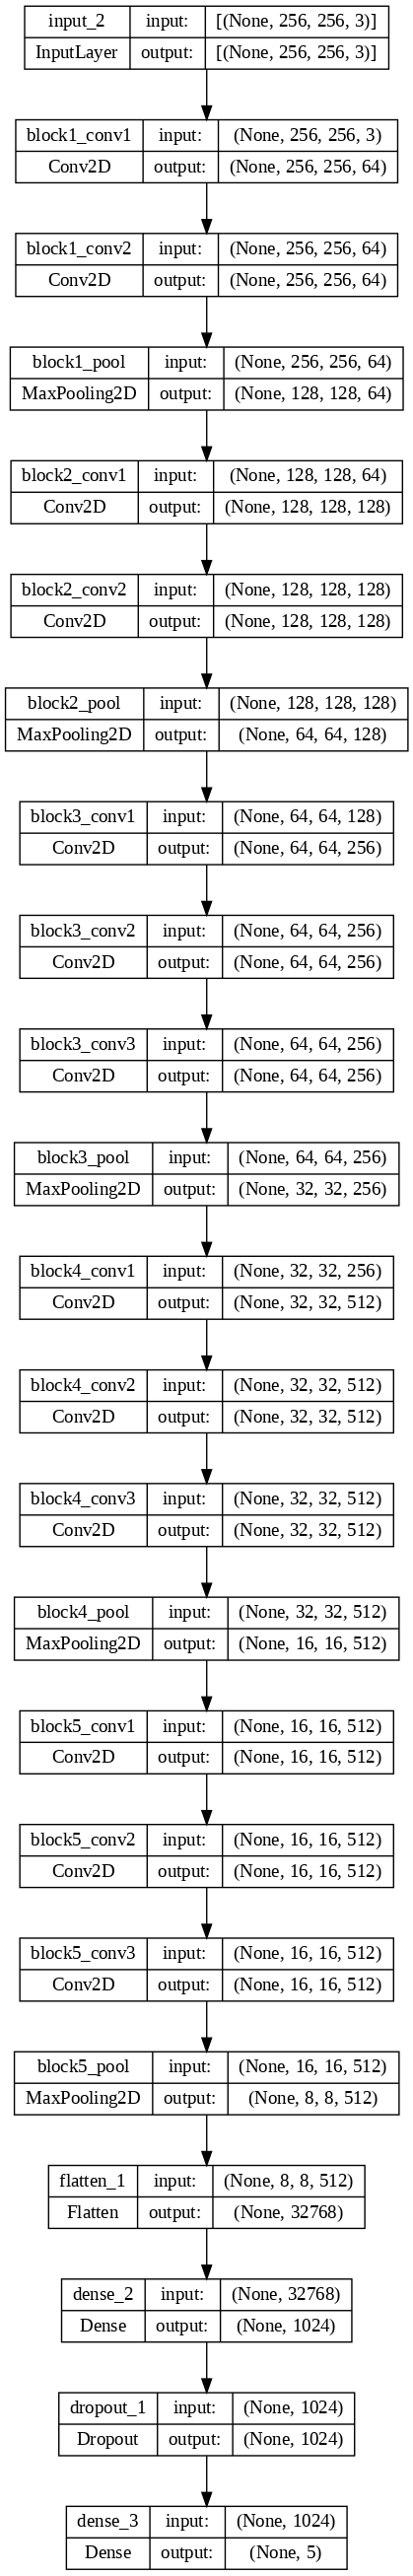

In [ ]:
plot_model(built_models['VGG16'], show_layer_names=True, show_shapes =True, dpi=100) # Plotting model architecture

**Architecture of InceptionV3**

In [ ]:
plot_model(built_models['InceptionV3'], show_layer_names=True, show_shapes =True, dpi=100) # Plotting model architecture

**Function definition:** compile_built_models() to compile and train the built models

In [ ]:
def compile_built_models(built_model, epoch_no):
  built_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = built_model.fit( trainData, steps_per_epoch=len(trainData), epochs=epoch_no, verbose=1, validation_data=testData, validation_steps=len(testData))
  return {'histories': history, 'trained_models': built_model}

**Setting no of epocs**

In [ ]:
epoch_no = 20

**Calling of compile_built_models() for each model for the given epoch no & saving the histories into model_histories variable**

In [ ]:
model_histories = dict()
trained_models = dict()
for built_model in built_models:
  print('******* Traning Phase for the model: ' + built_model + ' *******')
  compiled_models = compile_built_models(built_models[built_model], epoch_no)
  model_histories[built_model] = compiled_models['histories']
  trained_models[built_model] = compiled_models['trained_models']

******* Traning Phase for the model: ResNet50 *******
Epoch 1/20
13/13 [==============================] - 21s 495ms/step - loss: 50.9133 - accuracy: 0.2450 - val_loss: 15.7602 - val_accuracy: 0.2600
Epoch 2/20
13/13 [==============================] - 4s 335ms/step - loss: 10.1517 - accuracy: 0.2875 - val_loss: 5.4808 - val_accuracy: 0.2100
Epoch 3/20
13/13 [==============================] - 4s 318ms/step - loss: 2.9535 - accuracy: 0.3975 - val_loss: 2.2590 - val_accuracy: 0.3300
Epoch 4/20
13/13 [==============================] - 4s 289ms/step - loss: 1.6360 - accuracy: 0.4325 - val_loss: 1.4828 - val_accuracy: 0.4700
Epoch 5/20
13/13 [==============================] - 4s 329ms/step - loss: 1.3024 - accuracy: 0.4400 - val_loss: 1.6889 - val_accuracy: 0.3000
Epoch 6/20
13/13 [==============================] - 4s 290ms/step - loss: 1.3032 - accuracy: 0.4600 - val_loss: 1.4601 - val_accuracy: 0.3500
Epoch 7/20
13/13 [==============================] - 4s 311ms/step - loss: 1.1873 - accurac

**Function definition:** batch_rename_df_columns() to rename columns of each DataFrame with their respective model name

In [ ]:
def batch_rename_df_columns(df, model_name):
  columns = df.columns
  new_columns = dict()
  for column in columns:
    new_columns[column] = model_name + '-' + column
  df.rename(columns = new_columns, inplace = True)
  return df

**Storing ResNet50 history data into a DataFrame & renaming columns concating 'resnet50-' with each column**

In [ ]:
from pandas import DataFrame

ResNet50_DF = DataFrame(model_histories['ResNet50'].history)
ResNet50_DF = batch_rename_df_columns(ResNet50_DF, 'ResNet50')
ResNet50_DF

ResNet50-loss  ResNet50-accuracy  ResNet50-val_loss  ResNet50-val_accuracy
0       50.913258             0.2450          15.760171                   0.26
1       10.151748             0.2875           5.480770                   0.21
2        2.953481             0.3975           2.259029                   0.33
3        1.635983             0.4325           1.482765                   0.47
4        1.302400             0.4400           1.688875                   0.30
5        1.303217             0.4600           1.460085                   0.35
6        1.187324             0.4950           1.395818                   0.43
7        1.167082             0.5175           1.373914                   0.41
8        1.188613             0.5300           1.398221                   0.39
9        1.199129             0.5200           1.337077                   0.42
10       1.115051             0.5475           1.436823                   0.44
11       1.113853             0.5550           1.337837                   0.49
12       1.043778             0.5700           1.335296                   0.49
13       1.052798             0.5700           1.356432                   0.47
14       1.076218             0.5425           1.318038                   0.37
15       1.031043             0.6125           1.313241                   0.49
16       0.998345             0.6050           1.236023                   0.51
17       1.026906             0.5725           1.249654                   0.51
18       1.053282             0.5650           1.325863                   0.48
19       1.017542             0.6100           1.268224                   0.50

**Storing VGG16 history data into a DataFrame & renaming columns concating 'VGG16-' with each column**

In [ ]:
VGG16_DF = DataFrame(model_histories['VGG16'].history)
VGG16_DF = batch_rename_df_columns(VGG16_DF, 'VGG16')
VGG16_DF

VGG16-loss  VGG16-accuracy  VGG16-val_loss  VGG16-val_accuracy
0     8.710797          0.3200        2.903777                0.38
1     1.345089          0.6275        1.502403                0.58
2     0.530803          0.8250        1.072171                0.70
3     0.304604          0.8900        1.036968                0.68
4     0.182182          0.9375        0.773354                0.72
5     0.099869          0.9775        0.697322                0.75
6     0.079288          0.9825        0.572385                0.80
7     0.052382          0.9925        0.637294                0.79
8     0.035724          0.9950        0.643874                0.75
9     0.026252          1.0000        0.573301                0.80
10    0.021618          1.0000        0.554369                0.83
11    0.018594          1.0000        0.599292                0.78
12    0.012926          1.0000        0.563395                0.82
13    0.014589          1.0000        0.606786                0.77
14    0.016714          1.0000        0.599382                0.79
15    0.012389          1.0000        0.585525                0.80
16    0.010966          1.0000        0.625380                0.77
17    0.009765          1.0000        0.573961                0.80
18    0.009486          1.0000        0.587535                0.79
19    0.008897          1.0000        0.554844                0.81

**Storing VGG16 history data into a DataFrame & renaming columns concating 'VGG16-' with each column**

In [ ]:
InceptionV3_DF = DataFrame(model_histories['InceptionV3'].history)
InceptionV3_DF = batch_rename_df_columns(InceptionV3_DF, 'InceptionV3')
InceptionV3_DF

InceptionV3-loss  InceptionV3-accuracy  InceptionV3-val_loss  \
0          45.371368                0.3225             24.183950   
1          10.902418                0.6450             11.803864   
2           2.313923                0.8525              9.316002   
3           1.117485                0.8875              5.842550   
4           0.709524                0.9325              6.688948   
5           0.576137                0.9525              4.809843   
6           0.202779                0.9825              7.650073   
7           0.070246                0.9875              5.140701   
8           0.028320                0.9875              5.919558   
9           0.076878                0.9925              5.858638   
10          0.029221                0.9900              5.250593   
11          0.058252                0.9850              4.884551   
12          0.037811                0.9925              5.066422   
13          0.071203                0.9925              5.849199   
14          0.022396                0.9950              5.972652   
15          0.105284                0.9925              7.811927   
16          0.116772                0.9900              4.914049   
17          0.089397                0.9875              8.101777   
18          0.065328                0.9925              4.547878   
19          0.029901                0.9900              5.922131   

    InceptionV3-val_accuracy  
0                       0.55  
1                       0.53  
2                       0.60  
3                       0.69  
4                       0.64  
5                       0.70  
6                       0.65  
7                       0.68  
8                       0.67  
9                       0.69  
10                      0.70  
11                      0.72  
12                      0.68  
13                      0.63  
14                      0.72  
15                      0.65  
16                      0.73  
17                      0.67  
18                      0.67  
19                      0.68

**Concating three DataFrame into one DataFrame named: histories_DF**

In [ ]:
from pandas import concat

histories_DF = concat([ResNet50_DF, VGG16_DF, InceptionV3_DF], axis=1)
histories_DF

ResNet50-loss  ResNet50-accuracy  ResNet50-val_loss  \
0       50.913258             0.2450          15.760171   
1       10.151748             0.2875           5.480770   
2        2.953481             0.3975           2.259029   
3        1.635983             0.4325           1.482765   
4        1.302400             0.4400           1.688875   
5        1.303217             0.4600           1.460085   
6        1.187324             0.4950           1.395818   
7        1.167082             0.5175           1.373914   
8        1.188613             0.5300           1.398221   
9        1.199129             0.5200           1.337077   
10       1.115051             0.5475           1.436823   
11       1.113853             0.5550           1.337837   
12       1.043778             0.5700           1.335296   
13       1.052798             0.5700           1.356432   
14       1.076218             0.5425           1.318038   
15       1.031043             0.6125           1.313241   
16       0.998345             0.6050           1.236023   
17       1.026906             0.5725           1.249654   
18       1.053282             0.5650           1.325863   
19       1.017542             0.6100           1.268224   

    ResNet50-val_accuracy  VGG16-loss  VGG16-accuracy  VGG16-val_loss  \
0                    0.26    8.710797          0.3200        2.903777   
1                    0.21    1.345089          0.6275        1.502403   
2                    0.33    0.530803          0.8250        1.072171   
3                    0.47    0.304604          0.8900        1.036968   
4                    0.30    0.182182          0.9375        0.773354   
5                    0.35    0.099869          0.9775        0.697322   
6                    0.43    0.079288          0.9825        0.572385   
7                    0.41    0.052382          0.9925        0.637294   
8                    0.39    0.035724          0.9950        0.643874   
9                    0.42    0.026252          1.0000        0.573301   
10                   0.44    0.021618          1.0000        0.554369   
11                   0.49    0.018594          1.0000        0.599292   
12                   0.49    0.012926          1.0000        0.563395   
13                   0.47    0.014589          1.0000        0.606786   
14                   0.37    0.016714          1.0000        0.599382   
15                   0.49    0.012389          1.0000        0.585525   
16                   0.51    0.010966          1.0000        0.625380   
17                   0.51    0.009765          1.0000        0.573961   
18                   0.48    0.009486          1.0000        0.587535   
19                   0.50    0.008897          1.0000        0.554844   

    VGG16-val_accuracy  InceptionV3-loss  InceptionV3-accuracy  \
0                 0.38         45.371368                0.3225   
1                 0.58         10.902418                0.6450   
2                 0.70          2.313923                0.8525   
3                 0.68          1.117485                0.8875   
4                 0.72          0.709524                0.9325   
5                 0.75          0.576137                0.9525   
6                 0.80          0.202779                0.9825   
7                 0.79          0.070246                0.9875   
8                 0.75          0.028320                0.9875   
9                 0.80          0.076878                0.9925   
10                0.83          0.029221                0.9900   
11                0.78          0.058252                0.9850   
12                0.82          0.037811                0.9925   
13                0.77          0.071203                0.9925   
14                0.79          0.022396                0.9950   
15                0.80          0.105284                0.9925   
16                0.77          0.116772                0.9900   
17                0.80          0.089397  

**Finally adding a column named "Epoc" which is epoc no**

In [ ]:
histories_DF['Epoc'] = histories_DF.index + 1
histories_DF

ResNet50-loss  ResNet50-accuracy  ResNet50-val_loss  \
0       50.913258             0.2450          15.760171   
1       10.151748             0.2875           5.480770   
2        2.953481             0.3975           2.259029   
3        1.635983             0.4325           1.482765   
4        1.302400             0.4400           1.688875   
5        1.303217             0.4600           1.460085   
6        1.187324             0.4950           1.395818   
7        1.167082             0.5175           1.373914   
8        1.188613             0.5300           1.398221   
9        1.199129             0.5200           1.337077   
10       1.115051             0.5475           1.436823   
11       1.113853             0.5550           1.337837   
12       1.043778             0.5700           1.335296   
13       1.052798             0.5700           1.356432   
14       1.076218             0.5425           1.318038   
15       1.031043             0.6125           1.313241   
16       0.998345             0.6050           1.236023   
17       1.026906             0.5725           1.249654   
18       1.053282             0.5650           1.325863   
19       1.017542             0.6100           1.268224   

    ResNet50-val_accuracy  VGG16-loss  VGG16-accuracy  VGG16-val_loss  \
0                    0.26    8.710797          0.3200        2.903777   
1                    0.21    1.345089          0.6275        1.502403   
2                    0.33    0.530803          0.8250        1.072171   
3                    0.47    0.304604          0.8900        1.036968   
4                    0.30    0.182182          0.9375        0.773354   
5                    0.35    0.099869          0.9775        0.697322   
6                    0.43    0.079288          0.9825        0.572385   
7                    0.41    0.052382          0.9925        0.637294   
8                    0.39    0.035724          0.9950        0.643874   
9                    0.42    0.026252          1.0000        0.573301   
10                   0.44    0.021618          1.0000        0.554369   
11                   0.49    0.018594          1.0000        0.599292   
12                   0.49    0.012926          1.0000        0.563395   
13                   0.47    0.014589          1.0000        0.606786   
14                   0.37    0.016714          1.0000        0.599382   
15                   0.49    0.012389          1.0000        0.585525   
16                   0.51    0.010966          1.0000        0.625380   
17                   0.51    0.009765          1.0000        0.573961   
18                   0.48    0.009486          1.0000        0.587535   
19                   0.50    0.008897          1.0000        0.554844   

    VGG16-val_accuracy  InceptionV3-loss  InceptionV3-accuracy  \
0                 0.38         45.371368                0.3225   
1                 0.58         10.902418                0.6450   
2                 0.70          2.313923                0.8525   
3                 0.68          1.117485                0.8875   
4                 0.72          0.709524                0.9325   
5                 0.75          0.576137                0.9525   
6                 0.80          0.202779                0.9825   
7                 0.79          0.070246                0.9875   
8                 0.75          0.028320                0.9875   
9                 0.80          0.076878                0.9925   
10                0.83          0.029221                0.9900   
11                0.78          0.058252                0.9850   
12                0.82          0.037811                0.9925   
13                0.77          0.071203                0.9925   
14                0.79          0.022396                0.9950   
15                0.80          0.105284                0.9925   
16                0.77          0.116772                0.9900   
17                0.80          0.089397  

**Function definitation:** training_validation_accuracy() to plot training vs validation accuracy for each model

In [ ]:
from matplotlib.pyplot import plot, title, legend, figure, show

def training_valiadation_accuracy(model_history, model_name):
  epochs = range(len(model_history['accuracy']))
  plot(epochs, model_history['accuracy'], 'r', label='Training accuracy') # To get training accuracy
  plot(epochs, model_history['val_accuracy'], 'b', label='Validation accuracy') # To get validation accuracy
  title('Training and validation accuracy for: ' + model_name)
  legend(loc=0)
  figure()
  show()

**Function calling:** traing_validation_accuracy() for each model to plot training & validation accuracy

ResNet50


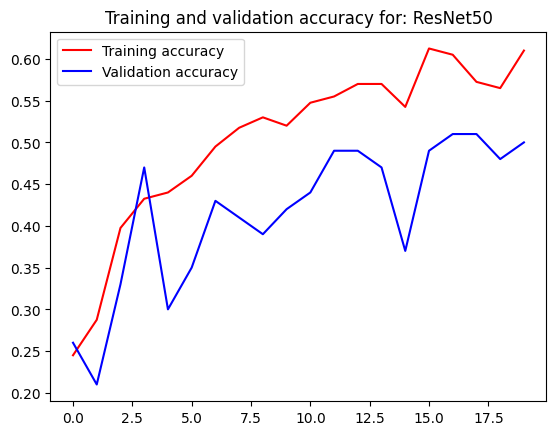

<Figure size 640x480 with 0 Axes>

VGG16


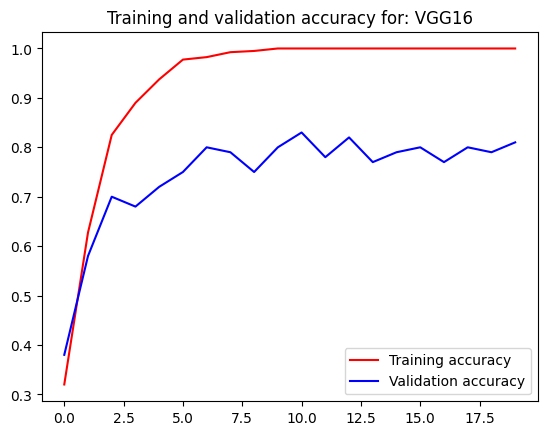

<Figure size 640x480 with 0 Axes>

InceptionV3


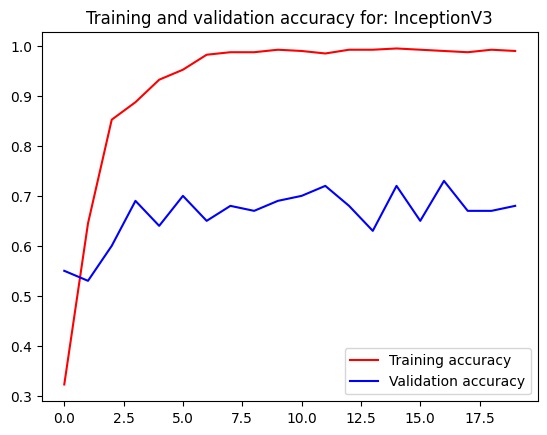

<Figure size 640x480 with 0 Axes>

In [ ]:
for model_name in model_histories:
  print(model_name)
  training_validation_accuracy(model_histories[model_name].history, model_name)

**Histogram of Accuracy of each model vs Epoc no**

<Axes: xlabel='Epoc'>

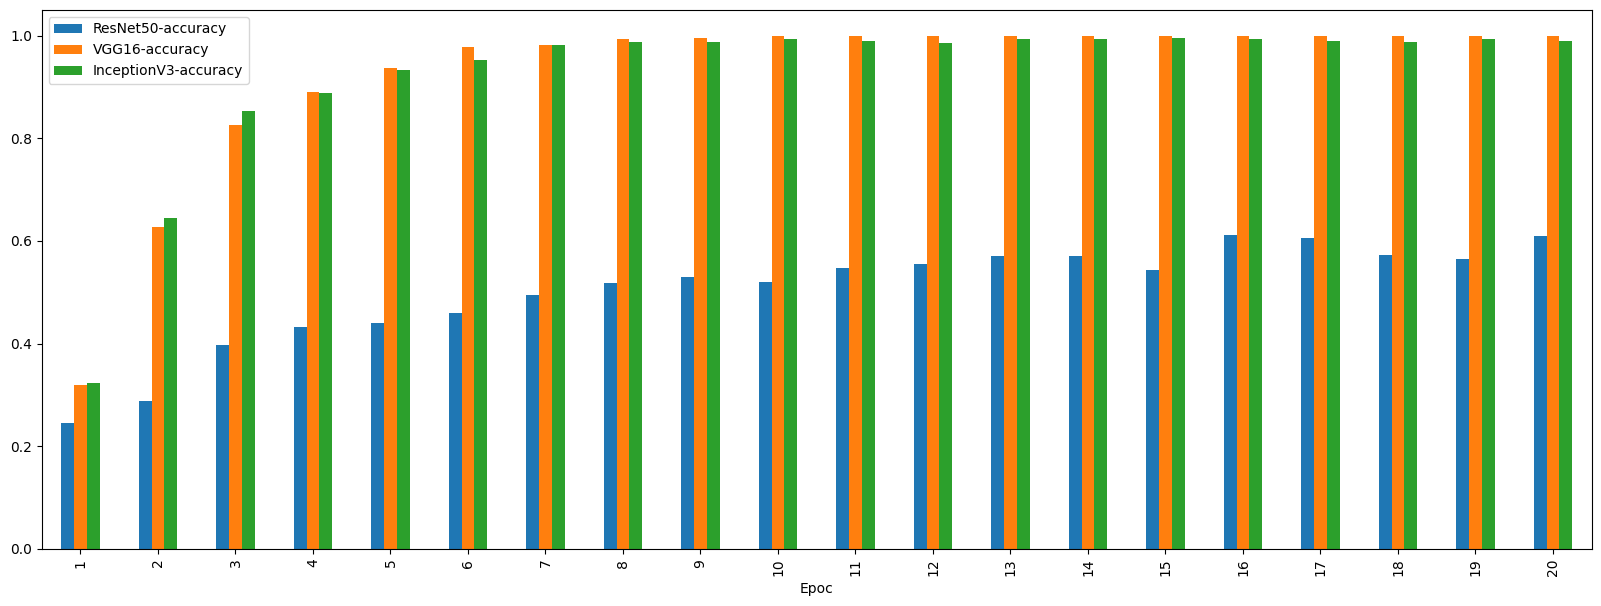

In [ ]:
histories_DF.plot(x='Epoc', y=['ResNet50-accuracy', 'VGG16-accuracy', 'InceptionV3-accuracy'], kind='bar', figsize=(20,7))

Based on the provided results for the models (ResNet50, VGG16, and InceptionV3) after 20 epochs on the image dataset, let's compare and identify the best model:

**Training Accuracy:**

- ResNet50: 61&
- VGG16: 100%
- InceptionV3: 99%

VGG16 achieved a perfect accuracy score on the training dataset, followed closely by InceptionV3. ResNet50 is significantly behind in this respect.

**Validation Accuracy:**

- ResNet50: 50%
- VG- G16: 81%
- InceptionV3: 68%

VGG16 has the highest validation accuracy, making it the best-performing model on unseen data. InceptionV3 is not far behind, but ResNet50 performs notably worse on validation data.

**Training Loss:**

- ResNet50: 1.268224
- VGG16: 0.008897
- InceptionV3: 0.029901

VGG16 and InceptionV3 have significantly lower training losses compared to ResNet50.

**Validation Loss:**

- ResNet50: 1.268224
- VGG16: 0.554844
- InceptionV3: 5.922131

VGG16 also has the lowest validation loss, further indicating its better generalization. InceptionV3, despite a lower training loss than VGG16, has a much higher validation loss, suggesting overfitting.

**Conclusions:**
Best Model: Based on the given results, VGG16 is the best model for this dataset as it has the highest validation accuracy and the lowest validation loss.

**Overfitting:**

- ResNet50: The model seems to underfit the training data, and its performance on validation data is not satisfactory.
- VGG16: Although it has achieved perfect training accuracy, its validation performance is commendable, suggesting it hasn't overfitted as severely as one might expect from a model with 100% training accuracy.
- InceptionV3: The gap between training and validation metrics (accuracy and especially loss) suggests that the model is overfitting the training data.

**Model Complexity and Characteristics:**

- ResNet50: Despite using skip connections to alleviate the vanishing gradient problem, it didn't perform well on this dataset. It might need more epochs, a different learning rate, or other regularization techniques.
- VGG16: Demonstrated high performance on both training and validation data. Its architecture, although simpler compared to the others, worked exceptionally well for this dataset.
- InceptionV3: The "inception" modules aim to capture spatial hierarchies using multiple-sized filters. However, given the significant overfitting observed, it might benefit from additional regularization or perhaps a modified training approach.

**Selecting the best model: VGG16**

In [ ]:
best_model = trained_models['VGG16']

**Saving the model for deployment**

In [ ]:
best_model.save("Grapevine_Leaves.h5")

**Loading model from saved HDF5 file**

In [ ]:
from keras.models import load_model

model_saved = load_model('Grapevine_Leaves.h5')
model_saved.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

**Prediction**

In [ ]:
from numpy import expand_dims, vstack
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(256, 256))
  x = img_to_array(img)
  x = expand_dims(x, axis=0)

  images = vstack([x])
  classes = model_saved.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Ak (44).png to Ak (44).png
1/1 [==============================] - 0s 20ms/step
Ak (44).png
[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 2.801896e-30]]
